In [3]:
# Второе задание понравилось куда больше первого,
# пытаться как-то разобраться в данных, найти какие-то особенности данных на которые стоит обратить внимание
# было интересно, хотя примечательных результатов достичь не удалось(ктоме того, что страница na-carnival-info-page)
# абсолютно неэффективна, возможно стоит потестировать ее для таких пользователей, для которых оставшиеся 2 страницы
# показывают нулевой результат, но для алгоритма, расчитанного на уже имеющийся набор данных, эту страницу не учитывал.
# на выполнение задачи потратил 2-3 дня(около 15 часов)
# ярко выраженных трудностей не появилось, сказывается общая неопытность.
# большую часть времени посвятил попыткам обнаружить какие особенности в данных, сам алгоритм писал около 2х часов
# так как не удалось обнаружить ярковыраженных особенностей взял 3 параметра(browser, os, country),
# по ним вычислил процент пользователей с подобными характеристиками и выбрал страницу с лучшим процентом.
# Для случая когда коофициенты для всех страниц равны 0 можно добавить отдельный выбор страниц,
# ставящий в приоритет страницу с минимальным количеством пользователей, увидивших эту страницу. 

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel('./Landing Page Data.xlsx')

In [6]:
import time
def timer(f):
    def tmp(*args, **kwargs):
        t = time.time()
        res = f(*args, **kwargs)
        print ("Время выполнения функции: {}".format(time.time()-t))
        return res

    return tmp

In [7]:
def get_coof(data: pd.core.frame.DataFrame,
             table: str, lp: str):
    try:
        all_users = data['show_date_time'][lp][table]
        if (all_users < 15):
            return (-1);
        return (data['user_id'][lp][table] / all_users)
    except KeyError:
        return -1

def count_itog_coof(info):
    coof = 0
    arif = 0 # подсчет количества параметров, учитываемых для расчета коофициента
    for i in range(3):
        if (info[i] != -1):
            arif += 1
            coof += info[i]
    if (arif == 0):
        return 0
    return (coof / arif)

def recomender(brow: pd.core.frame.DataFrame,
                osn: pd.core.frame.DataFrame,
                country: pd.core.frame.DataFrame,
                br: str, os: str, cntry: str):
    lp_br = lp_os = lp_cnt = ws_br = ws_os = ws_cnt = -1
    
    lp_br = get_coof(brow, br, 'lpceuwottvq4')
    lp_os = get_coof(osn, os, 'lpceuwottvq4')
    lp_cnt = get_coof(country, cntry, 'lpceuwottvq4')
    ws_br = get_coof(brow, br, 'woteutvsupport')
    ws_os = get_coof(osn, os, 'woteutvsupport')
    ws_cnt = get_coof(country, cntry, 'woteutvsupport')
    
    lp_coof = count_itog_coof([lp_br, lp_os, lp_cnt])
    ws_coof = count_itog_coof([ws_br, ws_os, ws_cnt])
        
    if (lp_coof >= ws_coof):
        return ('lpceuwottvq4')
    return ('woteutvsupport')


@timer
def get_recomendation(df):
    df_rework = df[['landing_page','user_id','show_date_time','browser','os_name','country']]
    brow = df_rework.groupby(['landing_page','browser']).count()[['show_date_time','user_id']]
    osn = df_rework.groupby(['landing_page','os_name']).count()[['show_date_time','user_id']]
    country = df_rework.groupby(['landing_page','country']).count() \
                [['show_date_time','user_id']]
    df['recomended'] = df.apply(lambda row: \
                       recomender(brow, osn, country, row['browser'], \
                                  row['os_name'], row['country']), axis=1)
    return (df)

df_new = get_recomendation(df)
df_new.head()

Время выполнения функции: 25.482803106307983


,landing_page,user_id,show_date_time,browser_version,browser,os_name,country,recomended
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,39.0.2171.65,Chrome,Windows,CZ,woteutvsupport
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,NaN,AndroidBrowser,Linux,DE,lpceuwottvq4
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,11.0,Microsoft Internet Explorer,Windows,GB,woteutvsupport
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,40.0.2214.94,Chrome,Windows,PL,woteutvsupport
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,11.0,Microsoft Internet Explorer,Windows,FR,woteutvsupport


In [8]:
#очень осмысленный граффик
# показывает, сколько пользователей могло бы зарегаться в зависимости от того, какая средняя эффективность смены страницы

In [9]:
df_check = df[['landing_page','user_id','recomended']].dropna(subset=['user_id'])
upl_pre = len(df_check)
upl_after = len(df_check[df_check['landing_page'] == df_check['recomended']])
df_check2 = df[['landing_page','user_id','recomended']]
df_check2 = df_check2[pd.isna(df_check2['user_id'])]
was_nol_load = len(df_check2)
got_new_page = len(df_check2[df_check2['landing_page'] != df_check2['recomended']])

In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [12]:
coof = np.round(np.linspace(0.0, 1.0, num = 100), 2)

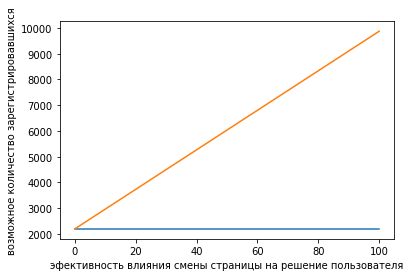

In [13]:
plt.plot(coof * 100,upl_pre + (coof*0))
plt.plot(coof * 100,(upl_after + ((upl_pre - upl_after) * (1-coof)) + got_new_page * coof));
plt.ylabel('возможное количество зарегистрировавшихся')
plt.xlabel('эфективность влияния смены страницы на решение пользователя')
plt.show()